<a href="https://colab.research.google.com/github/jcsnuesi/Car-price-prediction-/blob/main/Proyecto_2_Parte_4_Price_Car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

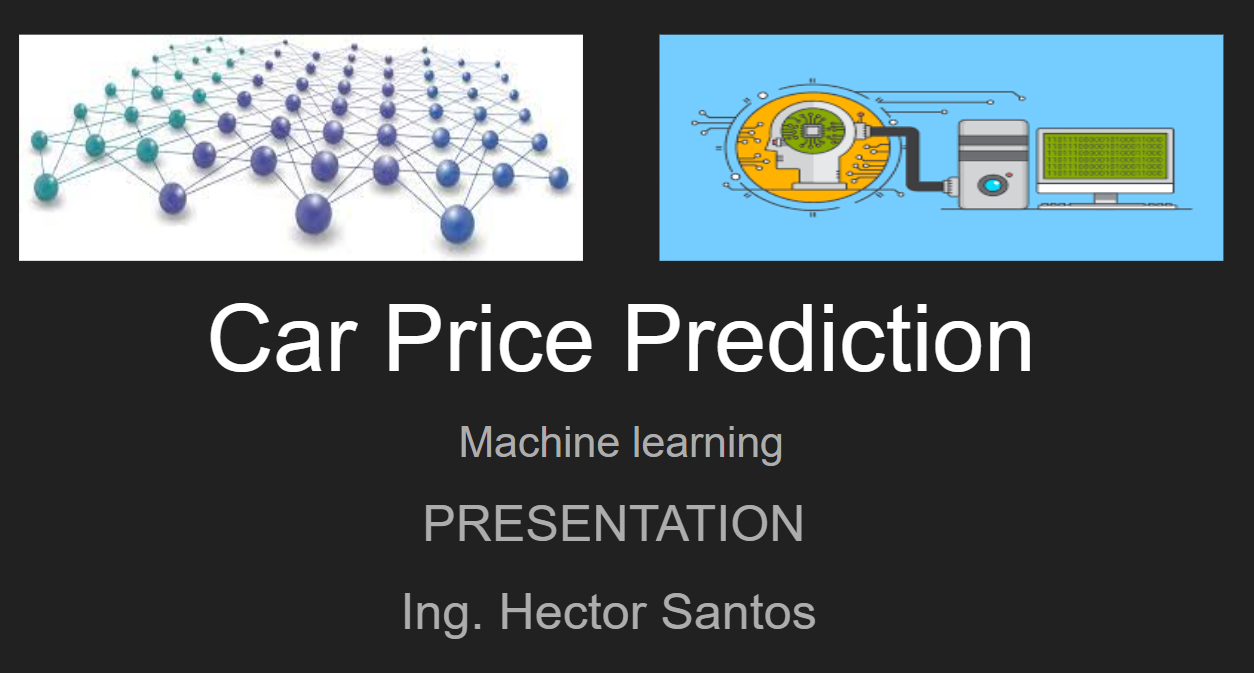

# Situación del problema:

Una compañía China aspira entrar al mercado Americano estableciendo sus fábricas en el referido país y de ese modo competir con sus principales competidores quienes son US y Europa.


En efecto, la empresa China decide contratar una compañía de consultoría automotriz para entender de qué factores el precio de los carros dependen. Especialmente, quieren saber cuáles factores afectan directamente el precio de los carros en el mercado Americano, debido a que este mercado es bastante diferente al Chino.

# La compañía quiere saber:

- Cuáles son las variables más significativas para la predicción del precio de los vehículos.


- Que tan eficiente puede ser la predicción en base a estas variables.



In [58]:
from google.colab import drive
drive.mount('content/')

Drive already mounted at content/; to attempt to forcibly remount, call drive.mount("content/", force_remount=True).


In [267]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score, accuracy_score

In [61]:
df = pd.read_csv('/content/content/MyDrive/Colab Notebooks/CarPrice_Assignment.csv')

# Development


In [62]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [63]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [64]:
df.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [65]:
df_copy = df.copy(deep=True)  

In [66]:
class ReadyToWork:

  def __init__(self,dataSet):

      self.dataSet = dataSet
   
  def checkDuplicated(self):

    duplicatedResponse = self.dataSet.duplicated().sum()

    print('Duplicated data: \n')
    return duplicatedResponse

  def checkMissindData(self):

    missingResponse = self.dataSet.isna().sum()

    return missingResponse

  def checkInconsistencyData(self):

    cat_cols = make_column_selector(dtype_include='object')
    col_details = {}

    for col in cat_cols(self.dataSet):
        col_details[col] = list(self.dataSet[col].unique()) 
        
    return col_details

  def replaceInconsistencyData(self,col, key,newKey=''):
      dateSet = self.dataSet[col]
      
      if type(key) == dict:
          dateSet.replace(key, inplace=True)
          print(f'Data replaced "{key}" \n')

      if type(key) == str:
         dateSet.replace(key,newKey, inplace=True)        
         print(f'Data replaced "{key}" to "{newKey}" \n')

     
     
      return dateSet.value_counts()

  def dataSpliter(self,col, delimeter,param=0):

    self.dataSet[col] = self.dataSet[col].apply(lambda x: x.split(delimeter)[param]) 
   
    return self.dataSet

  def ordinalCodification(self, col):
     encoder = LabelEncoder()

     print("************Starting Codification*************** \n")
     for cols in col:
         self.dataSet[cols] = encoder.fit_transform(self.dataSet[cols]) 
         print(encoder.classes_, "\n")
     
     print("************Codification completed*************** \n")
     return 

  def cleaner(self,dataToClean, axis):

  # Drop unnecessary columns
    newDataSet = self.dataSet.drop(columns=dataToClean, axis=axis)

    return  newDataSet


ready_class = ReadyToWork(df_copy)

In [67]:
# Duplicated data
print(ready_class.checkDuplicated())
print('\n')

# Missing data
print('- Missing data:\n\n',ready_class.checkMissindData())
print('\n')

#Check for atypical data
print('- Check for inconsistencies: \n\n',ready_class.checkInconsistencyData())
print('\n')

Duplicated data: 

0


- Missing data:

 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


- Check for inconsistencies: 

 {'CarName': ['alfa-romero giulia', 'alfa-romero stelvio', 'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls', 'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)', 'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5', 'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300', 'dodge rampage', 'dodge challenger

In [68]:
#Param 1: Columna name, Param 2: inconsistency, Param 3: position we want use to work
splited = ready_class.dataSpliter('CarName',' ',0)
splited.CarName


0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [69]:
ready_class.replaceInconsistencyData('CarName',{'alfa-romero':'alfa-romeo','maxda':'mazda','Nissan': 'nissan', 'porcshce': 'porsche',
      'saab':'subaru','toyouta': 'toyota', 'vokswagen':'volkswagen', 'vw':'volkswagen'})


Data replaced "{'alfa-romero': 'alfa-romeo', 'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'saab': 'subaru', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'}" 



toyota        32
subaru        18
nissan        18
mazda         17
honda         13
mitsubishi    13
volkswagen    12
volvo         11
peugeot       11
dodge          9
bmw            8
buick          8
audi           7
plymouth       7
porsche        5
isuzu          4
alfa-romeo     3
jaguar         3
chevrolet      3
renault        2
mercury        1
Name: CarName, dtype: int64

In [70]:
ready_class.replaceInconsistencyData('cylindernumber',{'two':0,'three': 1, 'four': 2,
      'five':3,'six': 4, 'eight':5, 'twelve':6})

Data replaced "{'two': 0, 'three': 1, 'four': 2, 'five': 3, 'six': 4, 'eight': 5, 'twelve': 6}" 



2    159
4     24
3     11
5      5
0      4
1      1
6      1
Name: cylindernumber, dtype: int64

In [71]:
ready_class.replaceInconsistencyData('doornumber',{'two':0,'four':1})


Data replaced "{'two': 0, 'four': 1}" 



1    115
0     90
Name: doornumber, dtype: int64

In [72]:
# Param 1: column to replace data, Param 2: key to replace, Param 3: new data
print(ready_class.replaceInconsistencyData('carbody','hardtop','convertible'))
print('\n')

#Columns to make an ordinal codification
columns = ['enginelocation','fueltype']
ready_class.ordinalCodification(columns)

Data replaced "hardtop" to "convertible" 

sedan          96
hatchback      70
wagon          25
convertible    14
Name: carbody, dtype: int64


************Starting Codification*************** 

['front' 'rear'] 

['diesel' 'gas'] 

************Codification completed*************** 



In [73]:
drop_cols = ['car_ID', 'symboling','wheelbase','boreratio','enginesize','stroke','compressionratio','peakrpm']
# Param 1: columns to drop, Param 2: axis (0 row of column, 1 complete column)
cleaned_dataset = ready_class.cleaner(drop_cols,1)

In [74]:
cleaned_dataset

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,fuelsystem,horsepower,citympg,highwaympg,price
0,alfa-romeo,1,std,0,convertible,rwd,0,168.8,64.1,48.8,2548,dohc,2,mpfi,111,21,27,13495.0
1,alfa-romeo,1,std,0,convertible,rwd,0,168.8,64.1,48.8,2548,dohc,2,mpfi,111,21,27,16500.0
2,alfa-romeo,1,std,0,hatchback,rwd,0,171.2,65.5,52.4,2823,ohcv,4,mpfi,154,19,26,16500.0
3,audi,1,std,1,sedan,fwd,0,176.6,66.2,54.3,2337,ohc,2,mpfi,102,24,30,13950.0
4,audi,1,std,1,sedan,4wd,0,176.6,66.4,54.3,2824,ohc,3,mpfi,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,1,std,1,sedan,rwd,0,188.8,68.9,55.5,2952,ohc,2,mpfi,114,23,28,16845.0
201,volvo,1,turbo,1,sedan,rwd,0,188.8,68.8,55.5,3049,ohc,2,mpfi,160,19,25,19045.0
202,volvo,1,std,1,sedan,rwd,0,188.8,68.9,55.5,3012,ohcv,4,mpfi,134,18,23,21485.0
203,volvo,0,turbo,1,sedan,rwd,0,188.8,68.9,55.5,3217,ohc,4,idi,106,26,27,22470.0


In [75]:
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CarName         205 non-null    object 
 1   fueltype        205 non-null    int64  
 2   aspiration      205 non-null    object 
 3   doornumber      205 non-null    int64  
 4   carbody         205 non-null    object 
 5   drivewheel      205 non-null    object 
 6   enginelocation  205 non-null    int64  
 7   carlength       205 non-null    float64
 8   carwidth        205 non-null    float64
 9   carheight       205 non-null    float64
 10  curbweight      205 non-null    int64  
 11  enginetype      205 non-null    object 
 12  cylindernumber  205 non-null    int64  
 13  fuelsystem      205 non-null    object 
 14  horsepower      205 non-null    int64  
 15  citympg         205 non-null    int64  
 16  highwaympg      205 non-null    int64  
 17  price           205 non-null    flo

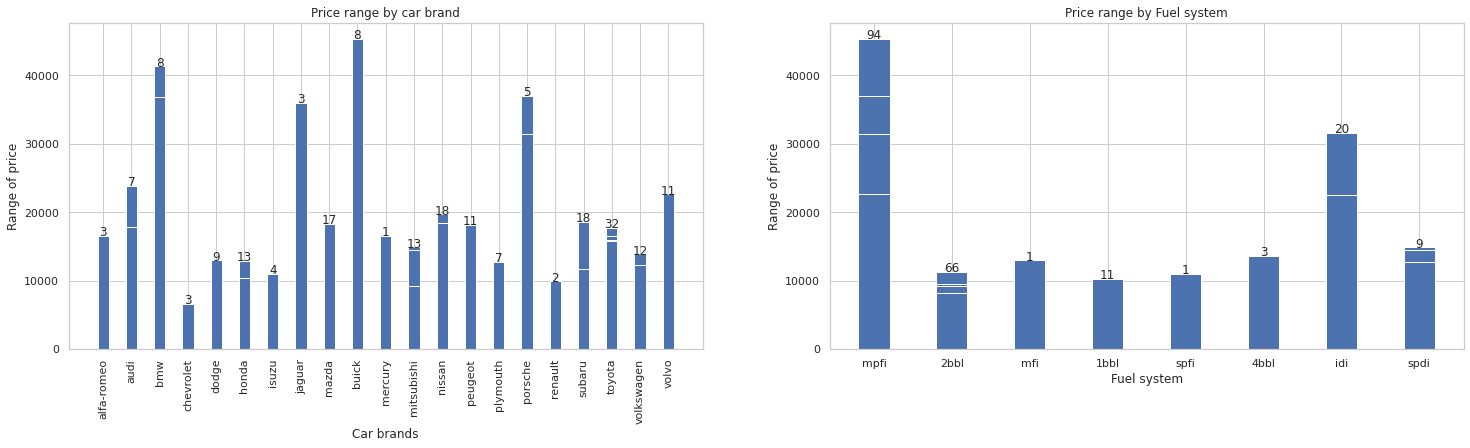

In [76]:
def add_value_label(y_list, datasets, col_y):
  for i in range(0, len(y_list)):
   
    plt.text(i, max(datasets.price[datasets[f'{col_y}'] == y_list[i]]) , datasets.CarName[datasets[f'{col_y}'] == y_list[i]].count(), ha="center")


plt.figure(figsize=(25, 6))

car_unique = cleaned_dataset.CarName.unique()

plt.subplot(1,2,1)

plt.bar(cleaned_dataset.CarName,cleaned_dataset.price, width = 0.4)
add_value_label(car_unique, cleaned_dataset, 'CarName' )
plt.title('Price range by car brand') 
plt.xlabel('Car brands')
plt.ylabel('Range of price')
plt.xticks(rotation=90)

fuelsystem_unique = cleaned_dataset.fuelsystem.unique()

plt.subplot(1,2,2)
plt.bar(cleaned_dataset.fuelsystem,cleaned_dataset.price,  width = 0.4)
add_value_label(fuelsystem_unique, cleaned_dataset, 'fuelsystem' )
plt.title('Price range by Fuel system')
plt.xlabel('Fuel system')
plt.ylabel('Range of price')

plt.show()


- Podemos visualizar que el grafico de la izquierda nos muestra que la mayoria de los carros de Europa y Americanos superan el precio medio de todos los vehiculos, por otra parte los vehiculos chinos y japoneses tienen mayor volumen de modelos y su rango de precio se mantiene en la media.

- En el segundo grafico, podemos observar como los vehiculos con sistemas de combustible "MPFI" representan el 46% de nuestros datos, por lo que se estima que es el mas popular de los sistemas ya que luego de explorar los datos a profundidad se observo que el 80% de las marcas en este dataset utilizan este sistema de combustible. Tambien podemos decir, que el 32% de las marcas utiliza el sistema 2bbl donde se aprecia que el rango de precio de las marcas es mucho menor encompraracion con el "MPFI".

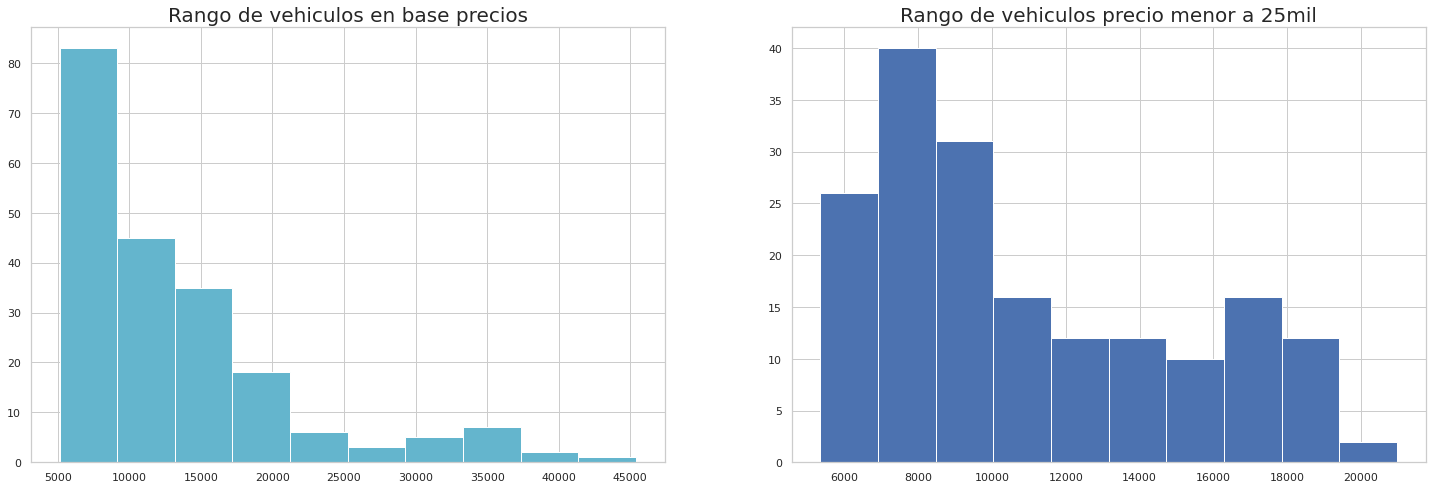

In [77]:
sns.set(style='whitegrid')
plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
plt.hist(cleaned_dataset['price'],  color = 'c')
plt.title('Rango de vehiculos en base precios', size=20)

plt.subplot(1,2,2)
xs = cleaned_dataset.price > 5300
ys = cleaned_dataset.price < 21000
cleaned_dataset.loc[xs & ys, 'price' ].hist()

plt.title('Rango de vehiculos precio menor a 25mil', size=20)


plt.show()

-Observacion:

Grafico dos visualiza el 86% de los datos en donde podemos ver que la mayoria de las marcas tienen precios de 6mil a 21mil US.

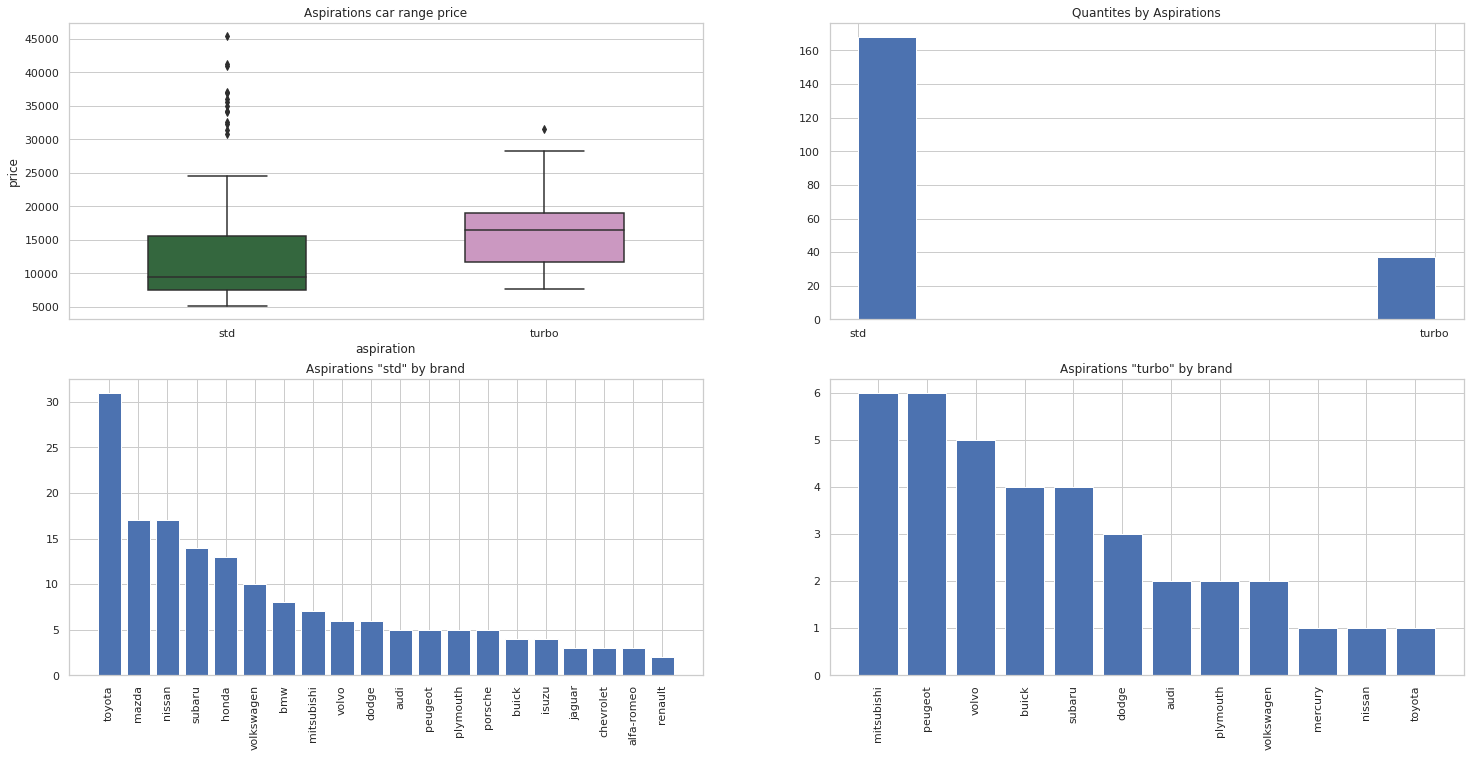

In [78]:
plt.figure(figsize=(25,12))

plt.subplot(2,2,1)
plt.title('Aspirations car range price')
sns.boxplot(x=cleaned_dataset.aspiration, y=cleaned_dataset.price, palette=("cubehelix"),width=0.5)

plt.subplot(2,2,2)
plt.title('Quantites by Aspirations')
plt.hist(cleaned_dataset.aspiration)

plt.subplot(2,2,3)
plt.title('Aspirations "std" by brand')
plt.bar(cleaned_dataset.CarName[cleaned_dataset.aspiration == 'std'].value_counts().index,cleaned_dataset.CarName[cleaned_dataset.aspiration == 'std'].value_counts())
plt.xticks(rotation = 90)

plt.subplot(2,2,4)
plt.title('Aspirations "turbo" by brand')
plt.bar(cleaned_dataset.CarName[cleaned_dataset.aspiration == 'turbo'].value_counts().index,cleaned_dataset.CarName[cleaned_dataset.aspiration == 'turbo'].value_counts())
plt.xticks(rotation = 90)


plt.show()

Observacion:


- Los vehiculos con "aspiration std" son mas populares entre las marcas Japonesas, mientras que el en mercado de Europa y Americano son utilizados pero con mejor presencia que en el mercado Japones, sin embargo, este sistema tiene presencia en todos los mercado por lo que se observa que su fabricacion es solicitada en el mercado.

- "aspiration turbo" tiene presencia en todos los mercados pero con un volumen reducido en comparacion con el "std" y no todas las marcas utilizan este sistema.

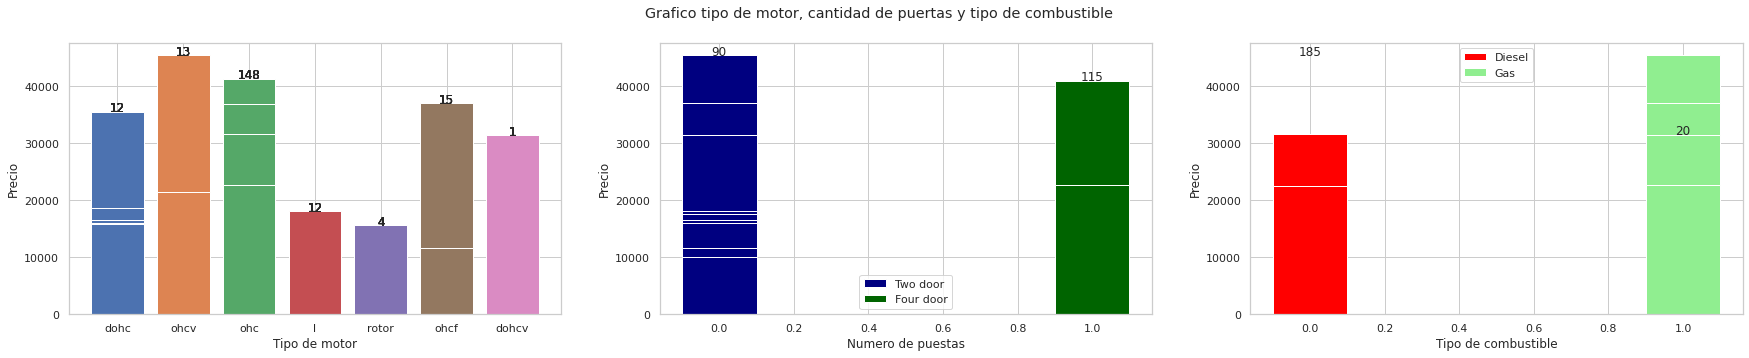

In [79]:
def add_value_label(y_list, datasets, col_y):
  for i in range(0, len(y_list)):
   
    plt.text(i, max(datasets.price[datasets[f'{col_y}'] == y_list[i]]) , datasets.CarName[datasets[f'{col_y}'] == y_list[i]].count(), ha="center")

sns.set(style='whitegrid')

fig = plt.figure(figsize=(30,5))

for engine  in cleaned_dataset.enginetype.unique():
    fig.suptitle('Grafico tipo de motor, cantidad de puertas y tipo de combustible')
    plt.subplot(1,3,1)
    plt.bar(cleaned_dataset.enginetype[cleaned_dataset.enginetype==engine], cleaned_dataset.price[cleaned_dataset.enginetype==engine])
    add_value_label(cleaned_dataset.enginetype.unique(), cleaned_dataset, 'enginetype' )
    plt.xlabel("Tipo de motor")
    plt.ylabel("Precio")

plt.subplot(1,3,2)
plt.bar(cleaned_dataset.doornumber[cleaned_dataset.doornumber==0], cleaned_dataset.price[cleaned_dataset.doornumber==0], width=0.2 ,color='navy')
plt.bar(cleaned_dataset.doornumber[cleaned_dataset.doornumber==1], cleaned_dataset.price[cleaned_dataset.doornumber==1],  width=0.2 ,color='darkgreen')
add_value_label(cleaned_dataset.doornumber.unique(), cleaned_dataset, 'doornumber' )
plt.xlabel("Numero de puestas")
plt.ylabel("Precio")
plt.legend(['Two door','Four door'])

plt.subplot(1,3,3)
plt.bar(cleaned_dataset.fueltype[cleaned_dataset.fueltype==0],cleaned_dataset.price[cleaned_dataset.fueltype==0], width=0.2 ,color='red')
plt.bar(cleaned_dataset.fueltype[cleaned_dataset.fueltype==1],cleaned_dataset.price[cleaned_dataset.fueltype==1], width=0.2 ,color='lightgreen')
add_value_label(cleaned_dataset.fueltype.unique(), cleaned_dataset, 'fueltype' )
plt.xlabel("Tipo de combustible")
plt.ylabel("Precio")
plt.legend(['Diesel','Gas'],loc='upper center' )


In [287]:
X = cleaned_dataset.drop(columns='price')
y = cleaned_dataset['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

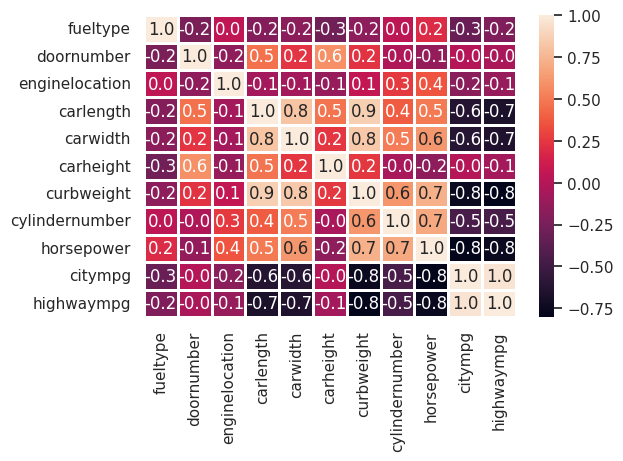

In [288]:
plt.figure(dpi=100)
sns.heatmap(X_train.corr(),annot=True, fmt=".1f", linewidths=0.9, linecolor="white")
plt.show()

- Observacion:

- El mapa de calor nos muestra la correlacion entre las diferentes caracteristicas de los vehiculos donde podemos apreciar que la relacion mas fuerte se encuentre entre las medidas de los vehiculos, caballos de fuerzas y el numero de cilindros del motor.

In [289]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(153, 17)
(52, 17)
(153,)
(52,)


In [290]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

ohe = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

cat_col = cat_selector(X_train)
num_col = num_selector(X_train)

cat_tupla =  (ohe,cat_col)
num_tupla =  (scaler,num_col)

preprocessing = make_column_transformer(cat_tupla,num_tupla, remainder = 'passthrough')

In [291]:
X_train_processed = preprocessing.fit_transform(X_train)
X_test_processed = preprocessing.transform(X_test)

In [277]:
print('Train:',X_train_processed.shape)
print('Test:',X_test_processed.shape)

Train: (153, 55)
Test: (52, 55)


In [306]:
class Models:

  def __init__(self,Xtrain_processed,Xtest_processed, ytrain, ytest):

    self.xtrain = Xtrain_processed
    self.xtest = Xtest_processed
    self.ytrain = ytrain
    self.ytest = ytest

  
  def randomForestModel(self,estimators=100,depth=1):
    
    for inc in range(0,depth):
      lgreg = RandomForestRegressor(n_estimators=estimators, max_depth=inc+1)
      lgreg.fit(X_train_processed,y_train)

      X_train_lg = lgreg.score(self.xtrain, y_train)
      X_test_lg = lgreg.score(self.xtest, y_test)

      pred = lgreg.predict(self.xtrain)

      print('\n************Max depth #',inc+1,'**************')
      print('\nRendimiendo datos de entremaniento:',X_train_lg, '\n')
      print('Rendimiendo datos de prueba:', X_test_lg, '\n')
      print(' R2 coeficiente de los datos de entrenamiento: ',r2_score(self.ytrain, pred),'\n')       
      print('\nMean absolute error: \n',mean_absolute_error(pred,self.ytrain))
      print('\nMean squared error: \n',mean_squared_error(pred,self.ytrain))
      print('\nResidual sum of squares: \n',mean_squared_error(pred,self.ytrain) * len(pred))
      print('\nRoot Mean Squared Error: \n',mean_squared_error(pred,self.ytrain, squared=False))
      print('Predicciones de los datos de entrenamiento: \n\n',pred)

    return pred

  def LinealRegression(self):

     reg = LinearRegression()
     reg.fit(self.xtrain,self.ytrain)

     train_score = reg.score(self.xtrain, self.ytrain)
     test_score =  reg.score(self.xtest, self.ytest)

     ypred_train = reg.predict(self.xtrain)
     

     r2_train = r2_score(self.ytrain, ypred_train)
       
     print('Rendimiendo datos de entremaniento:',train_score, '\n')
     print('Rendimiendo datos de prueba:', test_score, '\n')
     print(' R2 coeficiente de los datos de entrenamiento: ',r2_train,'\n')
     print('Predicciones de los datos de entrenamiento: \n\n',ypred_train)
     print('\nMean absolute error: \n',mean_absolute_error(ypred_train,self.ytrain))
     print('\nMean squared error: \n',mean_squared_error(ypred_train,self.ytrain))
     print('\nRoot Mean Squared Error: \n',mean_squared_error(ypred_train,self.ytrain, squared=False))

     
     return ypred_train
        
  def knn(self,neighbors=1):

    for inc in range(0,neighbors):
        knn =  KNeighborsRegressor(n_neighbors=inc+1)
        knn.fit(self.xtrain, y_train)
        knn_score_train = knn.score(self.xtrain, self.ytrain)
        knn_score_test = knn.score(self.xtest, self.ytest)
        knn_predict =  knn.predict(self.xtrain)
        print('\n************N neighbors #',inc+1,'**************')
        print('\nRendimiendo datos de entremaniento:',knn_score_train, '\n')
        print('Rendimiendo datos de prueba:', knn_score_test, '\n')
        print('Predicciones de los datos de entrenamiento: \n\n',knn_predict)

    return knn_predict

chooseModel = Models(X_train_processed,X_test_processed, y_train, y_test)

# Models

In [87]:
# No hyperparams
preds = chooseModel.LinealRegression()

Rendimiendo datos de entremaniento: 0.9717599054427214 

Rendimiendo datos de prueba: -2.2940378276831694e+23 

 R2 coeficiente de los datos de entrenamiento:  0.9717599054427214 

Predicciones de los datos de entrenamiento: 

 [22008. 11732.  7064. 18052.  6992.  6048. 14100.  8552. 11624. 13540.
  5920.  7788.  6428. 18180. 18084. 17116. 15892.  5700. 11060.  6960.
 33252.  8700.  4976.  6208. 16288. 10520.  6032. 14536. 12412.  6928.
 18240. 18792.  6420. 20004.  8524. 33252. 16708.  7880. 16708.  6536.
 13996. 10388. 14308.  8216. 18076. 10616.  6560.  6292. 14716. 15328.
  7996.  9048. 33704. 21712. 10852.  8224.  8240.  8780.  7588. 15816.
  8392.  8480.  9992. 12164.  8564.  9716. 15816. 33476.  5972.  6844.
  7412.  7752. 12396. 19332.  6332. 14304.  9224.  7352.  7968. 37496.
  9984.  6988. 19292. 16084.  5852. 13824. 15904.  9456.  5744. 23360.
 21972. 10520. 10632.  9872. 32524. 37472. 17128. 14368. 10892. 19476.
  9496.  6352. 14108.  6560. 20860. 10296. 15568. 33476.  8940

Luego de los datos escalados y preprocesados, instaciamos la clase modelo donde comenzaremos a evaluar el rendimiendo de los model con el modelo de regresion lineal nos muestra un rendimiento favorable para los datos de entrenamiento mas sin embargo, nos muestra un rendimiento fatal en los datos de prueba.

In [88]:
car_df_rl = pd.DataFrame({'Car Bran':X_train['CarName'],'fueltype':X_train['fueltype'], 'price': preds})
car_df_rl

,Car Bran,fueltype,price
125,porsche,1,22008.0
42,honda,1,11732.0
156,toyota,1,7064.0
136,subaru,1,18052.0
140,subaru,1,6992.0
...,...,...,...
106,nissan,1,16928.0
14,bmw,1,25256.0
92,nissan,1,6088.0
179,toyota,1,17688.0


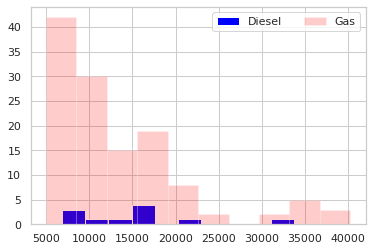

In [89]:
plt.hist(car_df_rl.price[car_df_rl.fueltype==0], label='Diesel', color="blue")
plt.hist(car_df_rl.price[car_df_rl.fueltype==1],label='Gas' , color="red", alpha=0.2) 
plt.legend(ncol=2)
plt.show()

- El grafico anterior nos muestra que el rango de precio de los vehiculos diesel es menos que el de gas, con un range de 0 a 32 mil para diesel y de 0 a 41 mil para gas.
- Se puede visualizar que los vehiculos de gas los de mayor rango acumulativo en nuestro dataset.

In [90]:
# n_neighbors = (by default 1)
knnPreds = chooseModel.knn(2)


************N neighbors # 1 **************

Rendimiendo datos de entremaniento: 0.9970510209291287 

Rendimiendo datos de prueba: 0.9141104271221056 

Predicciones de los datos de entrenamiento: 

 [22018.  10345.   6938.  18150.   7603.   6095.  16695.   9538.  12945.
 12764.   6669.   7957.   7609.  18620.  16845.  18150.  16500.   6189.
 11048.   7609.  34028.   6989.   5118.   7295.  17075.  10595.   6377.
 15510.  13845.   6529.  16925.  18950.   8058.  17710.   8558.  34028.
 15985.   7126.  17450.   5399.  12440.   9495.  16630.   8013.  16430.
 10245.   5572.   5348.  11199.  13495.   7995.   7975.  31600.  22470.
 11245.   8916.5  9298.   8921.  10295.  13200.   8921.   7957.   8778.
 11595.   8499.   8845.  17669.  32250.   7299.   7898.   6785.   7775.
 13950.  19699.   6695.  12170.   8195.   8358.   9980.  36000.   9959.
  7129.  18920.  13860.   6649.  14869.  15750.   8495.   5499.  23875.
 21105.  10595.  10898.   9895.  36880.  35056.  15690.  15040.  11549.
 18420.  

In [91]:
car_df_knn = pd.DataFrame({'Car Brand':X_train['CarName'],'fueltype':X_train['fueltype'], 'price': knnPreds})
car_df_knn

,Car Brand,fueltype,price
125,porsche,1,16783.5
42,honda,1,9422.0
156,toyota,1,7068.0
136,subaru,1,16595.0
140,subaru,1,6360.5
...,...,...,...
106,nissan,1,19049.0
14,bmw,1,22835.0
92,nissan,1,6772.0
179,toyota,1,17198.5


In [92]:
x_train_copied = X_train_processed.copy() 
x_test_copied =  X_test_processed.copy() 

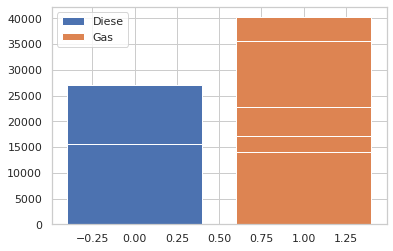

In [93]:
plt.bar(car_df_knn.fueltype[car_df_knn.fueltype==0],car_df_knn.price[car_df_knn.fueltype==0])
plt.bar(car_df_knn.fueltype[car_df_knn.fueltype==1],car_df_knn.price[car_df_knn.fueltype==1])
plt.legend(['Diese','Gas'])

# Model selected

In [307]:
# Param 1: n_estimators=(by default 100), Param 2: max_depth=(by default 1)
random_pred = chooseModel.randomForestModel(200,30)


************Max depth # 1 **************

Rendimiendo datos de entremaniento: 0.7257959937383378 

Rendimiendo datos de prueba: 0.6937202821747634 

 R2 coeficiente de los datos de entrenamiento:  0.7257959937383378 


Mean absolute error: 
 3079.2750052654264

Mean squared error: 
 17019265.138465002

Residual sum of squares: 
 2603947566.1851454

Root Mean Squared Error: 
 4125.441205309439
Predicciones de los datos de entrenamiento: 

 [10337.86901682 10337.86901682 10337.86901682 13750.52925378
 10403.944432   12900.7377231  22824.96038342 10337.86901682
 11116.88353977 18272.58615698 10337.86901682 16534.35089242
 10337.86901682 10337.86901682 16310.11551042 10337.86901682
 15376.86776734 10337.86901682 10337.86901682 15469.06390147
 10337.86901682 10337.86901682 14154.71421271 10463.05308796
 11116.88353977 15376.86776734 10337.86901682 10337.86901682
 10337.86901682 15469.06390147 14674.33814037 15559.63747321
 18272.58615698 10337.86901682 11629.38781115 10337.86901682
 22824.

- Observacion:

El modelo con mejor rendimiento en prueba y entrenamiento fue el RandromForest, ajustamos sus hiperparametros por lo cual pude observar que mientras más grande era el bosque mejor aprendía el modelo. En vista de eso, se obtuvo el mejor rendimiento en el estimador 30 "n_estimators=30" por lo que decidí no aumentar los estimadores para evitar el sobre ajuste, esto nos ofrojo un resultado en prueba 0.89% y en entrenamiento 0.98%, en cuanto a la estimación de los errores, tuvimos como resultado un 0.98% en la suma de los coeficientes internos or R2, esto nos indica que el modelo tiene buen rendimiento y puede predecir con una precisión muy buena.



In [308]:
car_df_rf = pd.DataFrame({'Car Brand':X_train['CarName'],'Fuel type':X_train['fueltype'], 'Price': random_pred})
car_df_rf

,Car Brand,Fuel type,Price
90,nissan,0,6964.9375
173,toyota,1,9542.2900
93,nissan,1,7168.9700
5,audi,1,15060.5800
167,toyota,1,9649.1100
...,...,...,...
106,nissan,1,17854.2200
14,bmw,1,22191.7950
92,nissan,1,6819.2950
179,toyota,1,16462.6450


In [310]:
cleaned_dataset.iloc[90:91,[0,-1]]

,CarName,price
90,nissan,7099.0


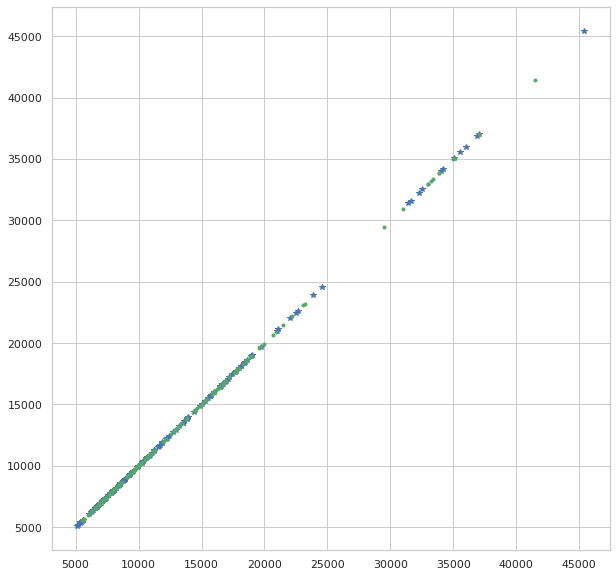

In [304]:
plt.figure(figsize=(10,10))
plt.plot(y_train,y_train ,'b*', random_pred,random_pred , 'g.')

In [312]:
input_shape = X_train_processed.shape[1]
input_shape

55

In [354]:
from gc import callbacks
model = Sequential()

earlyStop = EarlyStopping(patience = 10)

model.add(Dense(90, 
                input_dim = input_shape, 
                activation = 'relu',
                kernel_regularizer=l2(0.01))) 

model.add(Dense(60,
                activation = 'relu'))

model.add(Dropout(.3))
    

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'mse', optimizer = 'adam')

history = model.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test), 
                    epochs=1000,callbacks =[earlyStop],  verbose=False)

In [361]:
nn_predict = model.predict(X_train_processed)

5/5 [==============================] - 0s 3ms/step


In [382]:
car_df_rf = pd.DataFrame({'Car Brand':X_train['CarName'],'Fuel type':X_train['fueltype'], 'Price': y_train,'Price predict': random_pred, 'Predict average':nn_predict[:,0]})
car_df_rf

,Car Brand,Fuel type,Price,Price predict,Predict average
90,nissan,0,7099.0,6964.9375,0.999946
173,toyota,1,8948.0,9542.2900,0.998907
93,nissan,1,7349.0,7168.9700,0.999385
5,audi,1,15250.0,15060.5800,0.999480
167,toyota,1,8449.0,9649.1100,0.999076
...,...,...,...,...,...
106,nissan,1,18399.0,17854.2200,0.999426
14,bmw,1,24565.0,22191.7950,0.999685
92,nissan,1,6849.0,6819.2950,0.999569
179,toyota,1,15998.0,16462.6450,0.999580


In [381]:
resumen = pd.DataFrame({'Model':['Neural Network','Random Forest'],'MSE':[mean_squared_errors,mean_squared_errors_random_],'MAE':[mae_test,mae_absolute_error_random_],'R2 score':[r2_test,r2_test_random]}, index=None)
resumen

,Model,MSE,MAE,R2 score
0,Neural Network,15515.388952,13366.353343,-2.177743e+15
1,Random Forest,916.628428,614.667108,9.850333e-01


# Process

In [362]:
mae_test = mean_absolute_error(nn_predict[:,0], y_train)
err_rate = mae_test / np.mean(y_train)
r2_test = r2_score(nn_predict[:,0], y_train)
mean_squared_errors = mean_squared_error(nn_predict,y_train, squared=False)
# print("MSE = ", mse_test)
print("MAE = ", mae_test)
print("Error rate = ", err_rate)
print("R2 score = ", r2_test)
print("mean_squared_error = ", mean_squared_errors)

MAE =  13366.353343324723
Error rate =  0.9999252209576461
R2 score =  -2177742843813057.5
mean_squared_error =  15515.388952133077


In [363]:
random_pred

mae_absolute_error_random_ = mean_absolute_error(random_pred, y_train)
err_rate_random = mae_absolute_error_random_ / np.mean(y_train)
r2_test_random = r2_score(random_pred, y_train)
mean_squared_errors_random_ = mean_squared_error(random_pred,y_train, squared=False)
# print("MSE = ", mse_test)
print("MAE = ", mae_absolute_error_random_)
print("Error rate = ", err_rate_random)
print("R2 score = ", r2_test_random)
print("mean_squared_error = ", mean_squared_errors)

MAE =  614.6671078431374
Error rate =  0.04598270955723266
R2 score =  0.9850332651541881
mean_squared_error =  15515.388952133077


En el modelo knn con sus hiperparametros n_neighbors modificado tenemos el mejor resultado en su primera iteracion siendo este un Rendimiendo de datos de entremaniento: 0.99 y Rendimiendo datos de prueba: 0.89. Al igual que los demas modelos los vehiculos de gas sobrepasa el nivel de aceptacon que los vehiculos diesel. 

1) Fuente de datos

Kaggle - car price prediction

2) Breve descripción de datos

 205 Filas, 25 Columnas.
 No existes datos nulos
 Columnas categorias y numericas

3) ¿Cuál es el objetivo?

Entrenar nuestro modelo para la prediccion de precios de vehiculos en base a sus caracteristicas.

4) ¿Este es un problema de clasificación o regresión?

Este es un problema de regresion, debido que tenemos que obtener un valor o cifra en base a las caracteristicas de los datos de los vehiculos.

5) ¿Cuántas características hay?

Columnas object, interger y float

6) ¿Cuántas filas de datos hay?

205 filas

7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?

Primero tuve que hacer una codificacion ordinal a las columnas con valores con orden secuencial, como resultado el tipo de dato cambio de object a int, luego procedia a una codificacion one hot para la columnas categoricas no ordenadas gerarquicamente y por ultimo escalamiento de los valores para en mejor manejo de la data. Todo esto antes de instancia el modelo.

Conclusión:

- El modelo ideal para esta predicción es el RandomForestRegressor en comparación con el modelo de Red Neuronal, nuestro modelo RandomForestRegressor es más óptimo para predicción de este tipo con errores muy bajos y precisión casi exactas de un 98%. Este modelo es el más recomendable para conocer los precios de los vehículos en base a sus distintas variables.
